Bike\_ride\_analysis
====================

#### Rishav Mishra

#### 28/12/2021

Objective
---------

A marketing team believes the company’s future success depends on
maximizing the number of annual memberships. Therefore,your team wants
to understand how casual riders and annual members use Cyclistic bikes
differently. \#\# Analysis of bike sharing company cyclistic

#### Importing data sets

``` r
library(tidyverse)
```

    ## -- Attaching packages --------------------------------------- tidyverse 1.3.1 --

    ## v ggplot2 3.3.5     v purrr   0.3.4
    ## v tibble  3.1.6     v dplyr   1.0.7
    ## v tidyr   1.1.4     v stringr 1.4.0
    ## v readr   2.1.0     v forcats 0.5.1

    ## -- Conflicts ------------------------------------------ tidyverse_conflicts() --
    ## x dplyr::filter() masks stats::filter()
    ## x dplyr::lag()    masks stats::lag()

``` r
q2_2019 <- read_csv("Divvy_Trips_2019_Q2.csv")
```

    ## Rows: 1108163 Columns: 12

    ## -- Column specification --------------------------------------------------------
    ## Delimiter: ","
    ## chr  (4): 03 - Rental Start Station Name, 02 - Rental End Station Name, User...
    ## dbl  (5): 01 - Rental Details Rental ID, 01 - Rental Details Bike ID, 03 - R...
    ## dttm (2): 01 - Rental Details Local Start Time, 01 - Rental Details Local En...

    ## 
    ## i Use `spec()` to retrieve the full column specification for this data.
    ## i Specify the column types or set `show_col_types = FALSE` to quiet this message.

``` r
q3_2019 <- read_csv("Divvy_Trips_2019_Q3.csv")
```

    ## Rows: 1640718 Columns: 12

    ## -- Column specification --------------------------------------------------------
    ## Delimiter: ","
    ## chr  (4): from_station_name, to_station_name, usertype, gender
    ## dbl  (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
    ## dttm (2): start_time, end_time

    ## 
    ## i Use `spec()` to retrieve the full column specification for this data.
    ## i Specify the column types or set `show_col_types = FALSE` to quiet this message.

``` r
q4_2019 <- read_csv("Divvy_Trips_2019_Q4.csv")
```

    ## Rows: 704054 Columns: 12

    ## -- Column specification --------------------------------------------------------
    ## Delimiter: ","
    ## chr  (4): from_station_name, to_station_name, usertype, gender
    ## dbl  (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
    ## dttm (2): start_time, end_time

    ## 
    ## i Use `spec()` to retrieve the full column specification for this data.
    ## i Specify the column types or set `show_col_types = FALSE` to quiet this message.

``` r
q1_2020 <- read_csv("Divvy_Trips_2020_Q1.csv")
```

    ## Rows: 426887 Columns: 13

    ## -- Column specification --------------------------------------------------------
    ## Delimiter: ","
    ## chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
    ## dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
    ## dttm (2): started_at, ended_at

    ## 
    ## i Use `spec()` to retrieve the full column specification for this data.
    ## i Specify the column types or set `show_col_types = FALSE` to quiet this message.

#### Renaming columns for later use and binding.

``` r
(q4_2019 <- rename(q4_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid 
                   ,started_at = start_time  
                   ,ended_at = end_time  
                   ,start_station_name = from_station_name 
                   ,start_station_id = from_station_id 
                   ,end_station_name = to_station_name 
                   ,end_station_id = to_station_id 
                   ,member_casual = usertype))
```

    ## # A tibble: 704,054 x 12
    ##     ride_id started_at          ended_at            rideable_type tripduration
    ##       <dbl> <dttm>              <dttm>                      <dbl>        <dbl>
    ##  1 25223640 2019-10-01 00:01:39 2019-10-01 00:17:20          2215          940
    ##  2 25223641 2019-10-01 00:02:16 2019-10-01 00:06:34          6328          258
    ##  3 25223642 2019-10-01 00:04:32 2019-10-01 00:18:43          3003          850
    ##  4 25223643 2019-10-01 00:04:32 2019-10-01 00:43:43          3275         2350
    ##  5 25223644 2019-10-01 00:04:34 2019-10-01 00:35:42          5294         1867
    ##  6 25223645 2019-10-01 00:04:38 2019-10-01 00:10:51          1891          373
    ##  7 25223646 2019-10-01 00:04:52 2019-10-01 00:22:45          1061         1072
    ##  8 25223647 2019-10-01 00:04:57 2019-10-01 00:29:16          1274         1458
    ##  9 25223648 2019-10-01 00:05:20 2019-10-01 00:29:18          6011         1437
    ## 10 25223649 2019-10-01 00:05:20 2019-10-01 02:23:46          2957         8306
    ## # ... with 704,044 more rows, and 7 more variables: start_station_id <dbl>,
    ## #   start_station_name <chr>, end_station_id <dbl>, end_station_name <chr>,
    ## #   member_casual <chr>, gender <chr>, birthyear <dbl>

``` r
(q3_2019 <- rename(q3_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid 
                   ,started_at = start_time  
                   ,ended_at = end_time  
                   ,start_station_name = from_station_name 
                   ,start_station_id = from_station_id 
                   ,end_station_name = to_station_name 
                   ,end_station_id = to_station_id 
                   ,member_casual = usertype))
```

    ## # A tibble: 1,640,718 x 12
    ##     ride_id started_at          ended_at            rideable_type tripduration
    ##       <dbl> <dttm>              <dttm>                      <dbl>        <dbl>
    ##  1 23479388 2019-07-01 00:00:27 2019-07-01 00:20:41          3591         1214
    ##  2 23479389 2019-07-01 00:01:16 2019-07-01 00:18:44          5353         1048
    ##  3 23479390 2019-07-01 00:01:48 2019-07-01 00:27:42          6180         1554
    ##  4 23479391 2019-07-01 00:02:07 2019-07-01 00:27:10          5540         1503
    ##  5 23479392 2019-07-01 00:02:13 2019-07-01 00:22:26          6014         1213
    ##  6 23479393 2019-07-01 00:02:21 2019-07-01 00:07:31          4941          310
    ##  7 23479394 2019-07-01 00:02:24 2019-07-01 00:23:12          3770         1248
    ##  8 23479395 2019-07-01 00:02:26 2019-07-01 00:28:16          5442         1550
    ##  9 23479396 2019-07-01 00:02:34 2019-07-01 00:28:57          2957         1583
    ## 10 23479397 2019-07-01 00:02:45 2019-07-01 00:29:14          6091         1589
    ## # ... with 1,640,708 more rows, and 7 more variables: start_station_id <dbl>,
    ## #   start_station_name <chr>, end_station_id <dbl>, end_station_name <chr>,
    ## #   member_casual <chr>, gender <chr>, birthyear <dbl>

``` r
(q2_2019 <- rename(q2_2019
                   ,ride_id = "01 - Rental Details Rental ID"
                   ,rideable_type = "01 - Rental Details Bike ID" 
                   ,started_at = "01 - Rental Details Local Start Time"  
                   ,ended_at = "01 - Rental Details Local End Time"  
                   ,start_station_name = "03 - Rental Start Station Name" 
                   ,start_station_id = "03 - Rental Start Station ID"
                   ,end_station_name = "02 - Rental End Station Name" 
                   ,end_station_id = "02 - Rental End Station ID"
                   ,member_casual = "User Type"))
```

    ## # A tibble: 1,108,163 x 12
    ##     ride_id started_at          ended_at            rideable_type
    ##       <dbl> <dttm>              <dttm>                      <dbl>
    ##  1 22178529 2019-04-01 00:02:22 2019-04-01 00:09:48          6251
    ##  2 22178530 2019-04-01 00:03:02 2019-04-01 00:20:30          6226
    ##  3 22178531 2019-04-01 00:11:07 2019-04-01 00:15:19          5649
    ##  4 22178532 2019-04-01 00:13:01 2019-04-01 00:18:58          4151
    ##  5 22178533 2019-04-01 00:19:26 2019-04-01 00:36:13          3270
    ##  6 22178534 2019-04-01 00:19:39 2019-04-01 00:23:56          3123
    ##  7 22178535 2019-04-01 00:26:33 2019-04-01 00:35:41          6418
    ##  8 22178536 2019-04-01 00:29:48 2019-04-01 00:36:11          4513
    ##  9 22178537 2019-04-01 00:32:07 2019-04-01 01:07:44          3280
    ## 10 22178538 2019-04-01 00:32:19 2019-04-01 01:07:39          5534
    ## # ... with 1,108,153 more rows, and 8 more variables:
    ## #   01 - Rental Details Duration In Seconds Uncapped <dbl>,
    ## #   start_station_id <dbl>, start_station_name <chr>, end_station_id <dbl>,
    ## #   end_station_name <chr>, member_casual <chr>, Member Gender <chr>,
    ## #   05 - Member Details Member Birthday Year <dbl>

#### changing data types and binding

``` r
q4_2019 <-  mutate(q4_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 
q3_2019 <-  mutate(q3_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 
q2_2019 <-  mutate(q2_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 

all_trips <- bind_rows(q2_2019, q3_2019, q4_2019, q1_2020)
```

#### cleaning and processing data

``` r
all_trips <- all_trips %>%
  mutate(member_casual = recode(member_casual
                                ,"Subscriber" = "member"
                                ,"Customer" = "casual"))
table(all_trips$member_casual)
```

    ## 
    ##  casual  member 
    ##  905954 2973868

#### creating new columns for analysis

``` r
all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")


all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

is.factor(all_trips$ride_length)
```

    ## [1] FALSE

``` r
all_trips$ride_length<-as.numeric(all_trips$ride_length)
is.numeric(all_trips$ride_length)
```

    ## [1] TRUE

#### creating new table all\_trips\_v2 for analysis

``` r
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]
summary(all_trips_v2$ride_length)
```

    ##    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    ##       1     412     712    1479    1289 9387024

#### getting the popularity of stations

``` r
new1<-all_trips_v2 %>% count(start_station_name)
view(new1)
```

including bar charts for visaulisation and analysis
---------------------------------------------------

``` r
ggplot(data=all_trips_v2)+geom_bar(mapping=aes(x=member_casual,fill=member_casual))+facet_wrap(~day_of_week)+scale_fill_manual(values=c("darkblue","darkgreen"))
```

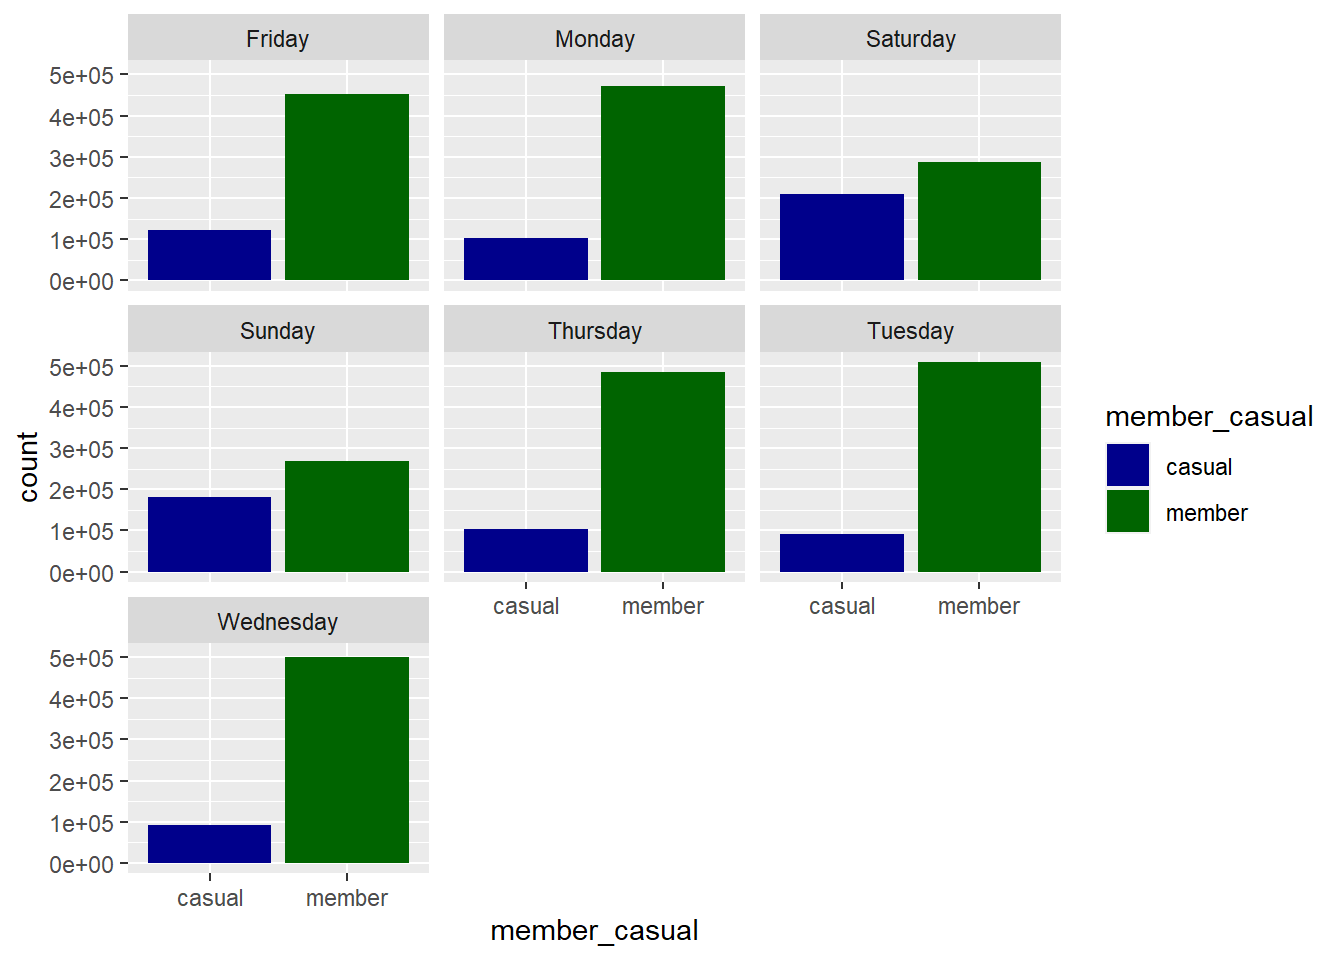

``` r
ggplot(data=all_trips_v2)+geom_bar(mapping=aes(x=month))+facet_wrap(~member_casual)
```

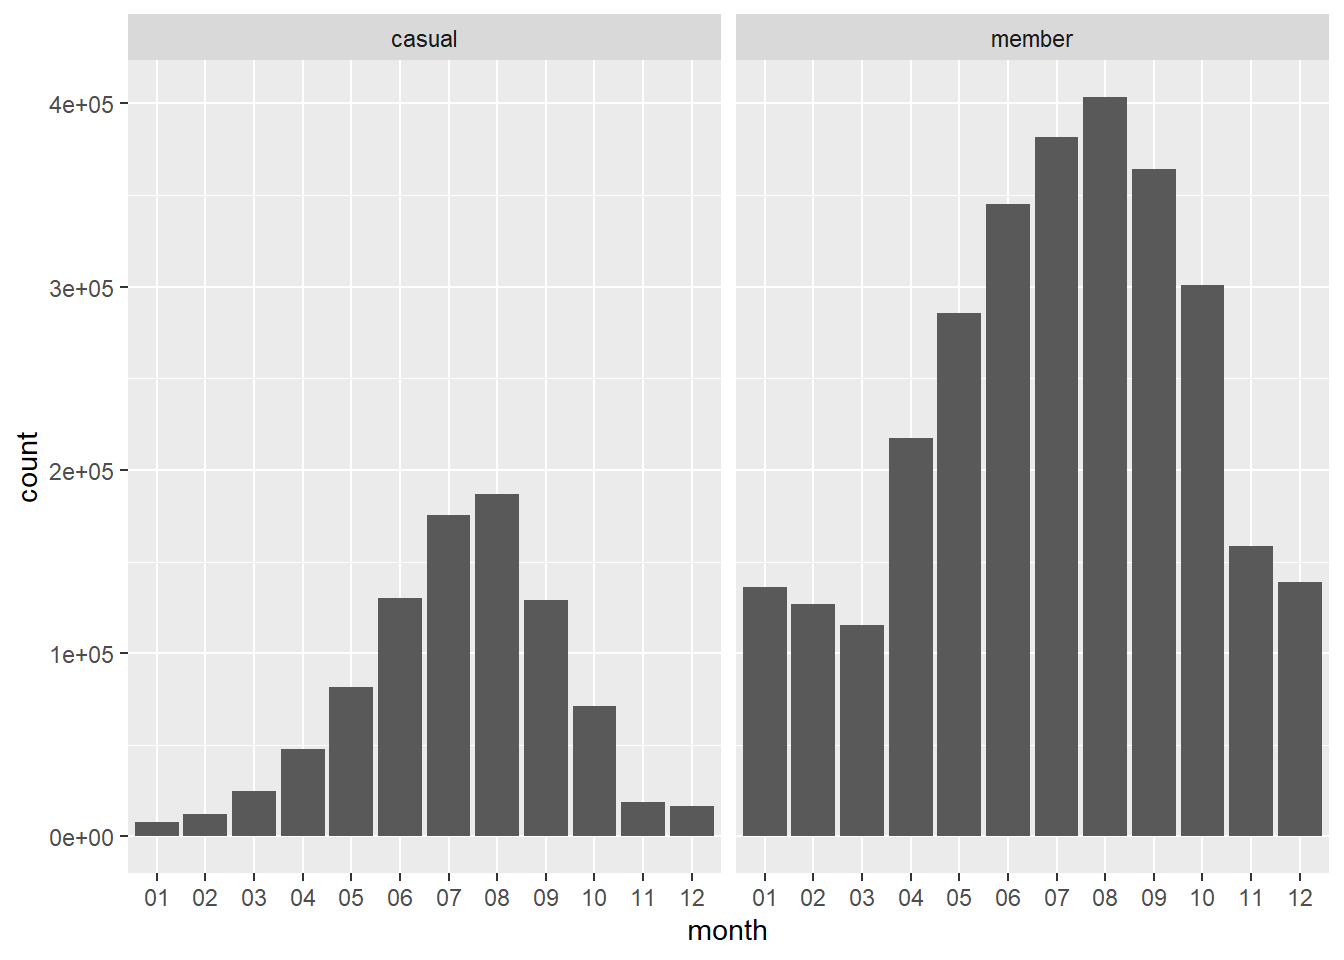

``` r
ggplot(data=all_trips_v2)+geom_col(mapping=aes(x=day_of_week,y=ride_length,fill=day_of_week))+facet_wrap(~member_casual)
```

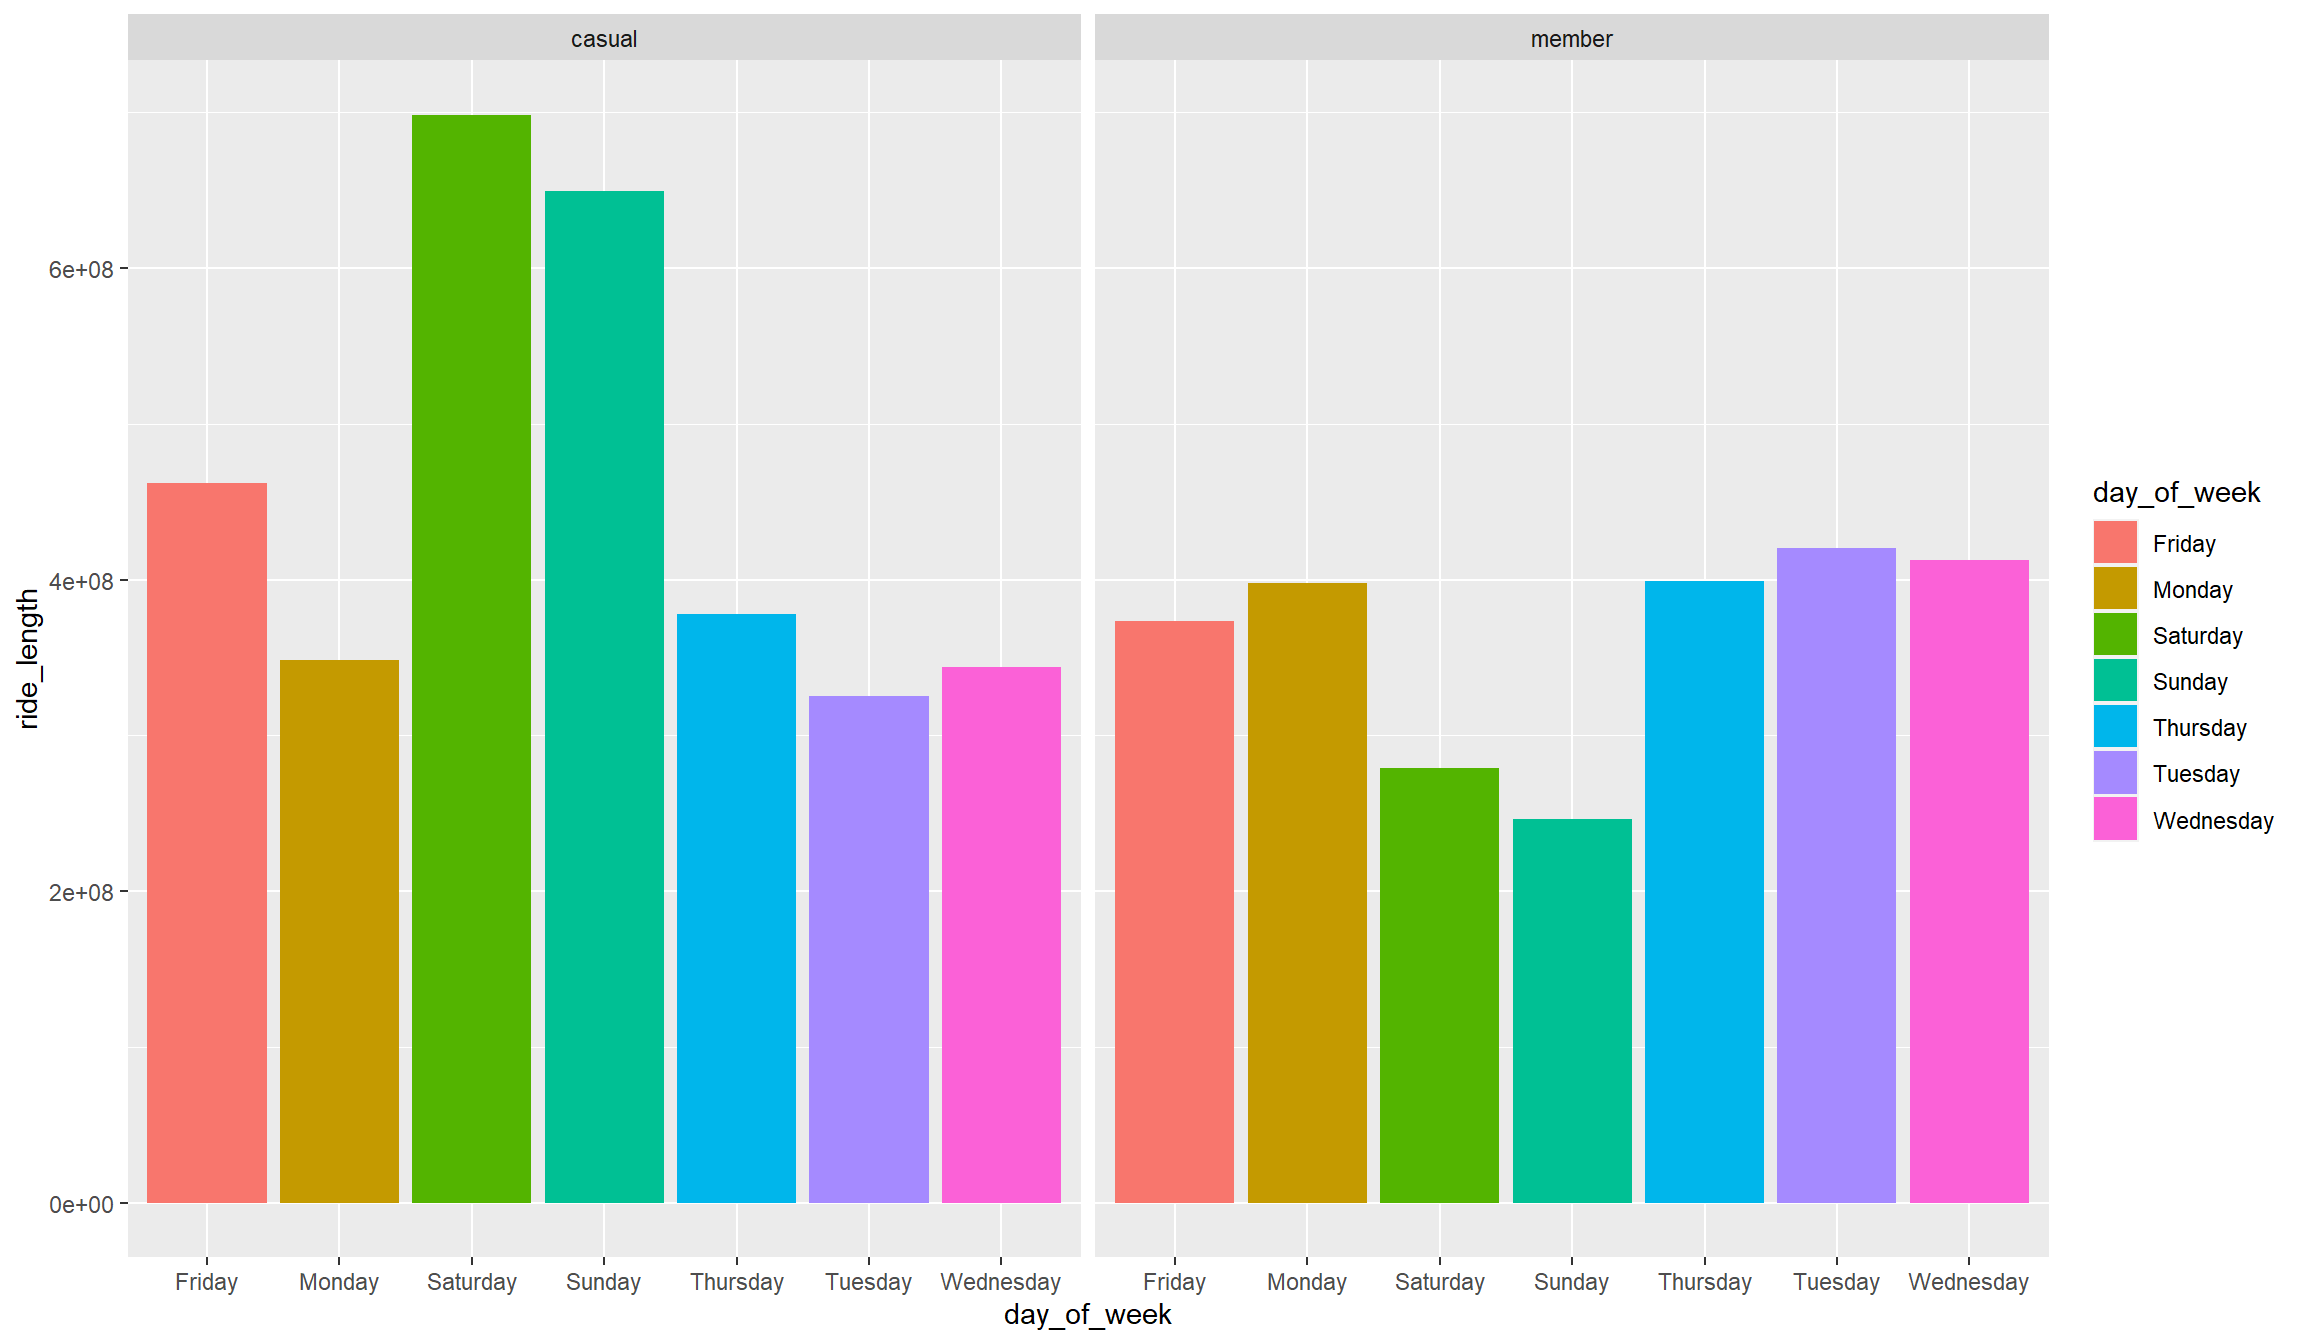

conclusion
----------

#### After processing and analysing data its found

-   Amount of casual rider is more in weekends.
-   Ride length is also more for casual riders on weekends.
-   use of Cyclistic have a peak on july and august.
-   So,to meet the objective i.e converting casual riders to members-
    -   new offer should be introduced for membership which will include
        lower ride charges for members in weekends.
    -   reduced charges should be given for members after a particular
        ride length in weekends.
    -   Marketing campaign should used in around area with least used
        starting station like LBS - BBB La Magie,south chicago ,Michigan
        Ave & 71st St etc.